In [ ]:
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#EXEMPLO 1

Aqui estão alguns exemplos gerais para trabalhar com a Regressão Linear

In [ ]:
# Dados
x_exemplo1 = [5,7,8,7,2,17,2,9,4,11,12,9,6,10]
y_exemplo1 = [99,86,87,88,111,86,103,87,94,78,77,85,86,70]

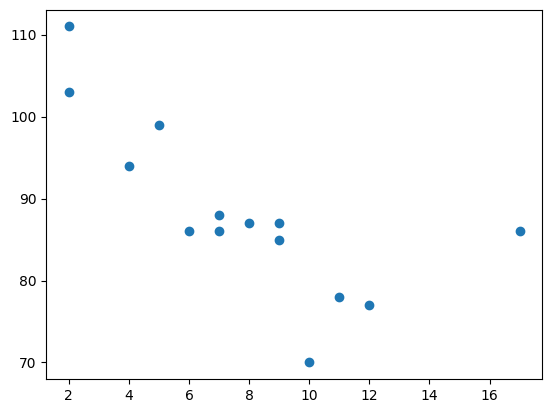

In [ ]:
# Plotando os dados
plt.scatter(x_exemplo1, y_exemplo1)
plt.show()

In [ ]:
inclinacao, interceptacao, r, p, std_err = stats.linregress(x_exemplo1, y_exemplo1)

In [ ]:
# Função linear
def minhafunc(x):
  return inclinacao * x + interceptacao

In [ ]:
modelo1 = list(map(minhafunc, x_exemplo1))

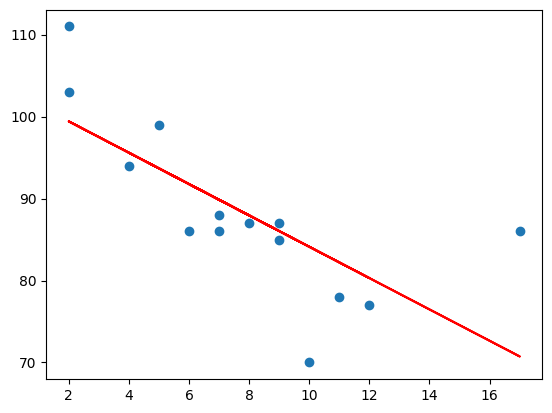

In [ ]:
# Desenhando a linha de tendência
plt.scatter(x_exemplo1, y_exemplo1)
plt.plot(x_exemplo1, modelo1, color='red')
plt.show()

In [ ]:
#Métricas da regressão linear
inclinacao, interceptacao, r, p, std_err = stats.linregress(x_exemplo1, y_exemplo1)
print(f"Inclinação: {inclinacao}")
print(f"Interceptação: {interceptacao}")
print(f"Coeficiente de Determinação: {r}")
print(f"Desvio Padrão: {std_err}")

Inclinação: -1.9123625458180602
Interceptação: 103.24625124958348
Coeficiente de Determinação: -0.7284797094148538
Desvio Padrão: 0.5191530792901847


#EXEMPLO 2

In [ ]:
# Gerando um conjunto de dados simples
np.random.seed(0)
X_exemplo2 = 2 * np.random.rand(100, 1)
y_exemplo2 = 4 + 3 * X_exemplo2 + np.random.randn(100, 1)

In [ ]:
# Dividindo o conjunto de dados em conjuntos de treino e teste
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_exemplo2, y_exemplo2, test_size=0.2, random_state=0)

In [ ]:
# Treinando o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train_2, y_train_2)

LinearRegression()

In [ ]:
# Fazendo previsões
y_pred_2 = regressor.predict(X_test_2)

In [ ]:
# Cria um DataFrame com valores previstos e reais
df_comparacao = pd.DataFrame(
{'Valores Previstos': y_pred_2.flatten(),
 'Valores Reais'    : y_test_2.flatten()}) # Removed .values

print(df_comparacao.head(25))

    Valores Previstos  Valores Reais
0            5.164264       4.446501
1            7.395365       6.139273
2            7.862353       8.082243
3            5.269720       5.644290
4            4.552506       3.571648
5            8.529307       7.646938
6            4.441100       4.131810
7            7.874582       6.802635
8            5.549080       4.617414
9            5.398231       5.780743
10           4.921662       4.644099
11           5.096400       5.647618
12           6.061573       4.629373
13           9.758335      10.530219
14           9.559691       9.170713
15           5.876079       7.454893
16           7.032601       5.498391
17           5.016977       3.536523
18           7.660739       9.320669
19           9.981895       8.711224


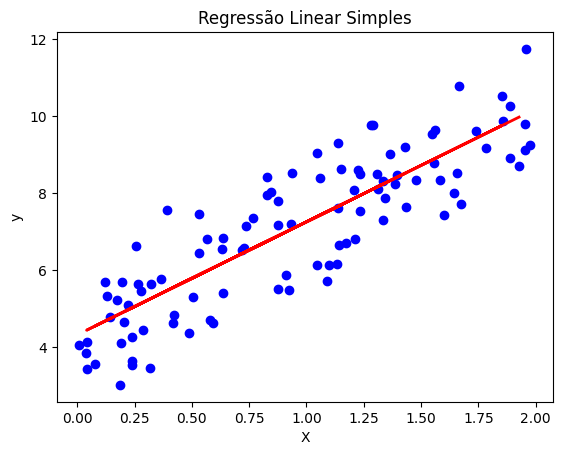

In [ ]:
# Plotando os resultados
plt.scatter(X_exemplo2, y_exemplo2, color='blue')
plt.plot(X_test_2, y_pred_2, color='red', linewidth=2)
plt.title('Regressão Linear Simples')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
#Métricas da regressão linear
inclinacao, interceptacao,r_value, p_value, std_err = stats.linregress(X_exemplo2.flatten(), y_exemplo2.flatten())
print(f"Inclinação: {inclinacao}")
print(f"Interceptação: {interceptacao}")
print(f"Coeficiente de Determinação: {r_value}")
print(f"Desvio Padrão: {std_err}")

Inclinação: 2.968467510701019
Interceptação: 4.222151077447231
Coeficiente de Determinação: 0.8642702080660166
Desvio Padrão: 0.1745266452207032


In [ ]:
# Avaliando desempenho do modelo
mae = sklearn.metrics.mean_absolute_error(y_test_2, y_pred_2)
mse = sklearn.metrics.mean_squared_error(y_test_2, y_pred_2)
rmse = np.sqrt(mse)


In [ ]:
# Calculando RMSPE
mean_y = np.mean(y_test_2)
rmspe = (rmse / mean_y) * 100


In [ ]:
# Printando os resultados
print("Erro médio absoluto (MAE):", round(mae, 2))
print("Erro quadrático médio (MSE):", round(mse, 2))
print("Raiz quadrada do erro quadrático médio (RMSE):", round(rmse, 2))
print("Erro médio percentual quadrático raiz (RMSPE):", round(rmspe, 2))


Erro médio absoluto (MAE): 0.9
Erro quadrático médio (MSE): 1.04
Raiz quadrada do erro quadrático médio (RMSE): 1.02
Erro médio percentual quadrático raiz (RMSPE): 16.21


# EXERCÍCIO 1: PREÇO DAS CASAS

Encontre as métricas de avaliação do modelo e do seu desempenho e responda: O
Modelo consegue explicar a variação dos dados observados?


In [ ]:
# Lembre-se de carregar o dataset Housing.csv antes de começar
housing = pd.read_csv("/content/Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Selecionando as variáveis numéricas
housing = housing[["price", "area", "bedrooms", "bathrooms", "stories", "parking"]]

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [ ]:
# Visualizando as relações entre as variáveis e o preço
price_correlations = housing.corr()["price"]
# Aqui, foi possível visualizar que a variável "area" tem a maior relação linear com o preço

price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

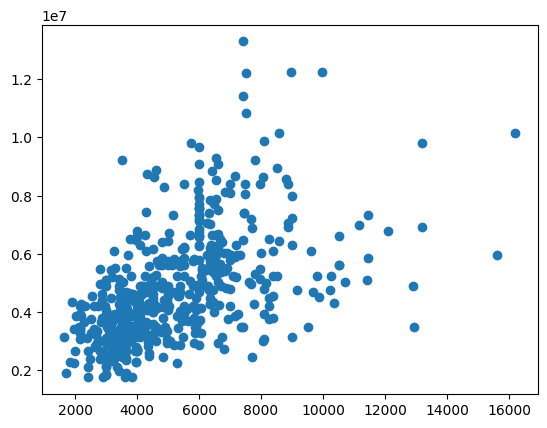

In [ ]:
# Visualizando as relações de área e preço
X = housing[["area"]]
y = housing[["price"]]

plt.scatter(X, y)

In [ ]:
# Ajustando as dimensões das categorias
X=X.reshape(len(X),1)
y=y.reshape(len(y),1)

In [ ]:
# Dividindo entre conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criando a linha de Regressão Linear Simples
regressao = LinearRegression()
regressao.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calculando as previsões
y_pred = regressao.predict(X_test)

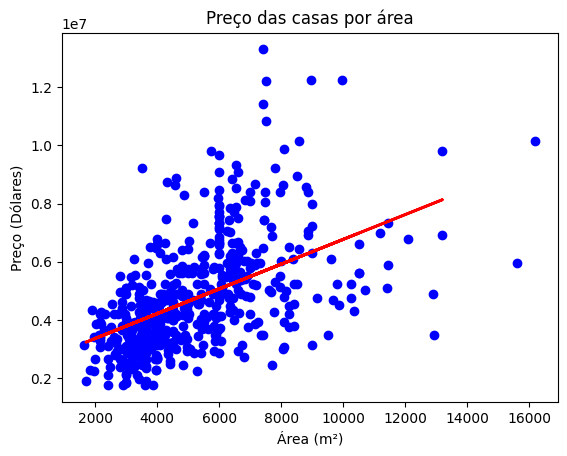

In [ ]:
# Mostrando os outputs
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Preço das casas por área')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (Dólares)')
plt.show()

In [ ]:
# Avaliação do Modelo





#EXERCICIO 1

Num estudo de poluição num curso de água, a concentração de poluição é medida em 5 locais diferentes. Os locais estão a distâncias diferentes do
fonte de poluição. Na tabela abaixo, essas distâncias e a poluição média
são dados:

    Distância até a fonte de poluição (em km) = 2,4,6,8,10,

    Concentração média = 11.5, 10.2, 10.3, 9.68, 9.32



In [ ]:
# Preparação dos Dados




In [ ]:
# Métricas da Regressão Linear




In [ ]:
# Mostrando o Resultado (Plot)





In [ ]:
# Metricas de Avaliação





#EXERCICIO 2

Um psicólogo investigando a relação entre o tempo que um indivíduo leva para
reagir a um certo estímulo e sua idade obteve os seguintes resultados:

    Y - Tempo de reação (segundos) = 96,92,106,100,98,104,110,101,116,106,109,100,112,105,118,108,113,112,127,117

    X - Idade (em anos) = 20,20,20,20,25,25,25,25,30,30,30,30,35,35,35,35,40,40,40,40


Crie um modelo de regressão linear para esse caso e responda: Para cada ano, qual é o tempo de reação esperado?


In [ ]:
# Preparação dos Dados




In [ ]:
# Métricas da regressão linear




In [ ]:
# Modelo





In [ ]:
# Mostrando o resultado (Plot)





#EXERCICIO 3

Uma determinada empresa cervejeira gostaria saber quais são variaveis de mais impacto no consumo de cerveja.
A partir do dataset abaixo, encontre as variáveis que tem maior correlação.



In [ ]:
dados_cerv =pd.read_csv("/content/consumo_cerveja.csv",delimiter=';')
dados_cerv.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [ ]:
dados_cerv = dados_cerv.drop(columns=['Data'])

In [ ]:
# Correlação





In [ ]:
# Separe as variaveis que tenham maior correlação em X e y




In [ ]:
# Dividindo entre conjunto de teste e treinamento




In [ ]:
# Criando o modelo




LinearRegression()

In [ ]:
# Calculando as previsões




In [ ]:
# Mostrando os outputs





In [ ]:
# Encontrando as métricas de avaliação do modelo





#TAREFA

As métricas R², MAE, MSE e RMSE fornecem informações adicionais sobre o desempenho e a precisão do modelo de regressão, enquanto o resumo do ANOVA se concentra na análise da significância das variáveis escolhidas.

Pesquise sobre o uso da biblioteca statsmodels (https://www.statsmodels.org/stable/index.html)

Tente criar um sumário detalhando as métricas encontradas, e verifique se variável escolhida no exercício 3 poderia ser substituida por outra.